coefficenti angolari e misura di g e k

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

In [3]:
m=pd.read_csv('masse_cumulative.csv')
T=pd.read_csv('periodi.csv')
x_=pd.read_csv('elongazione.csv')

In [4]:
T_m=T.mean()/5
T_s=T.std()/(5*np.sqrt(5))
m_m=m.mean()/1.081605
m_s=m.std()
x_m=x_.mean()
x_s=x_.std()

In [5]:
T_qm=pow(T_m,2)
T_qs=2*T_m*T_s

In [6]:
m_m=np.array(m_m)
T_qm=np.array(T_qm)
x_m=np.array(x_m)

In [10]:
T_qm_=T_qm[2:]
m_m_=m_m[2:]
x_m_=x_m[2:]
T_qs_=T_qs[2:]
x_s_=x_s[2:]

In [11]:
def my_mean(x, w):
    return np.sum( x*np.power(w, -2) ) / np.sum( np.power(w, -2) )

def my_cov(x, y, w):
    return my_mean(x*y, w) - my_mean(x, w)*my_mean(y, w)

def my_var(x, w):
    return my_cov(x, x, w)

In [12]:
def my_fit(x, y, sd_y, verbose=True):
    m = my_cov(x, y, sd_y) / my_var(x, sd_y)
    var_m = 1 / ( my_var(x, sd_y) * np.sum( np.power(sd_y, -2)) )
    c = np.mean(y) - np.mean(x) * m
    var_c = my_mean(x*x, sd_y)  / ( my_var(x, sd_y) * np.sum( np.power(sd_y, -2)))
    cov_mc = - my_mean(x, sd_y) / ( my_var(x, sd_y) * np.sum( np.power(sd_y, -2))) 
   
    return m, np.sqrt(var_m), c, np.sqrt(var_c), cov_mc

In [26]:
alpha1,alpha1_s,c1,c1_s,cov1=my_fit(m_m_,T_qm_,T_qs_)

Text(0, 0.5, 'periodo^2 in s^2')

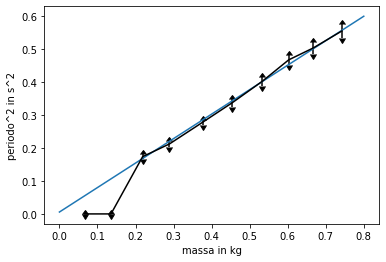

In [27]:
plt.errorbar(m_m,T_qm,T_qs,color='black',uplims=True, lolims=True)
x=np.linspace(0,0.8)
y=alpha1*x+c1
plt.plot(x,y)
plt.xlabel('massa in kg')
plt.ylabel('periodo^2 in s^2')

In [28]:
k1=4*pow(np.pi,2)*pow(alpha1,-1)
k1_s=4*pow(np.pi,2)*pow(alpha1,-2)*alpha1_s

In [30]:
print(k1,k1_s)

53.279452985004816 1.792489241497211


In [51]:
alpha2,alpha2_s,c2,c2_s,cov2=my_fit(m_m_,x_m_,x_s_)

Text(0.5, 0, 'massa in kg')

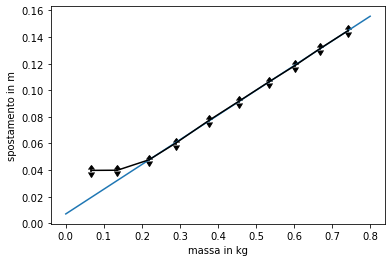

In [52]:
plt.errorbar(m_m,x_m,x_s,color='black',uplims=True, lolims=True)
x=np.linspace(0,0.8)
y=alpha2*x+c2
plt.plot(x,y)
plt.ylabel('spostamento in m')
plt.xlabel('massa in kg')

In [53]:
alpha3,alpha3_s,c3,c3_s,cov3=my_fit(x_m_,T_qm_,T_qs_)

Text(0, 0.5, 'periodo^2 in s^2')

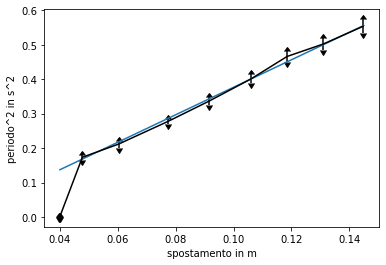

In [54]:
plt.errorbar(x_m,T_qm,T_qs,color='black',uplims=True, lolims=True,xuplims=True, xlolims=True)
x=np.linspace(0.04,0.145)
y=alpha3*x+c3
plt.plot(x,y)
plt.xlabel('spostamento in m')
plt.ylabel('periodo^2 in s^2')

In [55]:
g1=4*pow(np.pi,2)/alpha3

In [56]:
g1_s=4*pow(np.pi,2)*pow(alpha3,-2)*alpha3_s

In [58]:
g2=4*pow(np.pi,2)*alpha2/alpha1

In [64]:
g2_s=4*pow(np.pi,2)*np.sqrt(pow(1/alpha1*alpha1_s,2)+pow(alpha2/pow(alpha1,2)*alpha2_s,2))
g2_s

1.3284876122526783